In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
# import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}

th, td {
    font-size: large;
}
</style>

# One-minute Review

### Example

Find the flux of the vector field $(1 - x)\,\vec i - y\, \vec j$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.

[3Demos demo](https://drew.youngren.nyc/3Demos/surfint/index.html?a=0&b=2&c=0&d=2*pi&x=u+cos%28v%29&y=u+sin%28v%29&z=u&P=1+-+x&Q=-y&R=0&E=x%5E2+%2B+y%5E2&divergence=false&curl=false&colorFunc=false&surfaceVisible=true&tanFrameVisible=false&trailsVisible=true&S=graphs&nX=30&rNum=10&cNum=10&shards=0&nVec=6&scale=0.42)

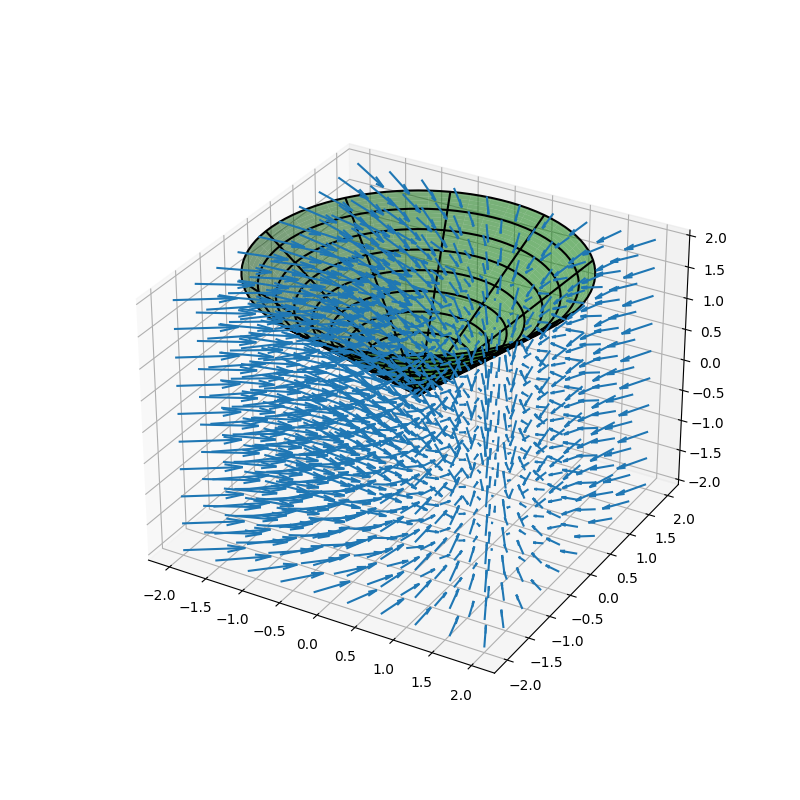

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig = plt.figure(figsize=(8,8), num=TITLE)

    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,2,100)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5,color='g')
    ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(-2,2,10)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,1 - U,-V,0*U,length=.2);
    
    return fig.canvas

a("Flux Example")





#### Solution

$\vec r(u,v) = u\cos v\,\vec i + u \sin v\, \vec j + u\,\vec k$ for $0 \leq u \leq 2, 0 \leq v \leq 2\pi$.

$\vec r_u \times \vec r_v = -u\cos v\,\vec i - u \sin v\, \vec j + u\,\vec k$.

$$\iint_C \vec F\cdot \vec N dS = \int_0^{2\pi} \int_0^2 (-u \cos v + u^2\cos^2 v + u^2 \sin^2 v)\,du\,dv = \frac{16\pi}{3}$$

In [4]:
dblquad(lambda u, v: -u*cos(v) + u**2, 0, 2*pi, 0, 2)[0]

16.755160819145562

In [5]:
16*pi/3

16.755160819145562

####
<p style="padding-bottom:40%;"> </p>

# Lecture 22
## Curl & Stokes' Theorem

  - Objectives
    - Curl
      - compute the curl of a vector field
      - interpret direction and magnitude of curl vector
      - relate to grad and div
    - Stokes' Theorem
      - orient a surface and its boundary
      - recognize when it applies
      - relate to divergence theorem
  - Resources
    - Content
      - Stewart: §16.6-9
      - New Strang:  
        - [§6.7](https://openstax.org/books/calculus-volume-3/pages/6-7-stokes-theorem)
      - [3Demos](https://drew.youngren.nyc/3Demos/surfint/)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Stokes' Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInStokesTheorem)
    - Extras 
      - CalcBLUE: [Stokes' Theorem](https://www.youtube.com/watch?v=ypFo3YPtWBg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=77) *Use with caution. This is a different and more general formulation of surface integrals. 


<p style="padding-bottom:40%;"> </p>

## Div, grad, curl
We introduce the "del" operator $\nabla$.

$$\nabla = \frac{\partial}{\partial x} \,\vec i + \frac{\partial}{\partial y} \,\vec j + \frac{\partial}{\partial z} \,\vec k $$

Applying vector operations to this "vector" yields different kinds of derivatives:

<p style="padding-bottom:40%;"> </p>

##  Scalar multiplication

The gradient of a scalar field $f(x,y,z)$ is a vector field given by 

$$\operatorname{grad}f = \nabla f = f_x \,\vec i + f_y \,\vec j + f_z \,\vec k$$

<p style="padding-bottom:40%;"> </p>

##  Dot product

The divergence of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is a scalar field given by 

$$\operatorname{div}\vec F = \nabla \cdot \vec F = P_x  + Q_y  + R_z $$

<p style="padding-bottom:40%;"> </p>

##  Cross product

The curl of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is another vector field given by 

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} $$ 

$$ = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$

<p style="padding-bottom:40%;"> </p>

| name |&nbsp; form| in | out |
|---|---|---|---|
|derivative | &nbsp; $$\frac{d}{dx} f(x)$$ | scalar | scalar | 
|partial | $\frac{\partial}{\partial x}f(x,y)$ | scalar | scalar | 
| grad | $\nabla f(x,y)$ | scalar | vector |
| div | $\nabla \cdot \vec F(x,y,z)$ | vector | scalar |
| curl | $\nabla \times \vec F(x,y,z)$ | vector | vector |

<p style="padding-bottom:40%;"> </p>

# Curl

The curl of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is another vector field given by 

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} $$ 

$$ = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$

The curl measures the spin or rotation of a vector field. It is a vector with the direction giving the axis of rotation and the magnitude indicating the strength of the rotation (as indicated by the right hand rule).  

<p style="padding-bottom:40%;"> </p>

### Example

Compute the curl $\nabla \times \vec F$ for the vector field 
$$ \vec F(x,y,z) = y \,\vec i - x  \,\vec j + \frac{x^2}{2} \,\vec k $$


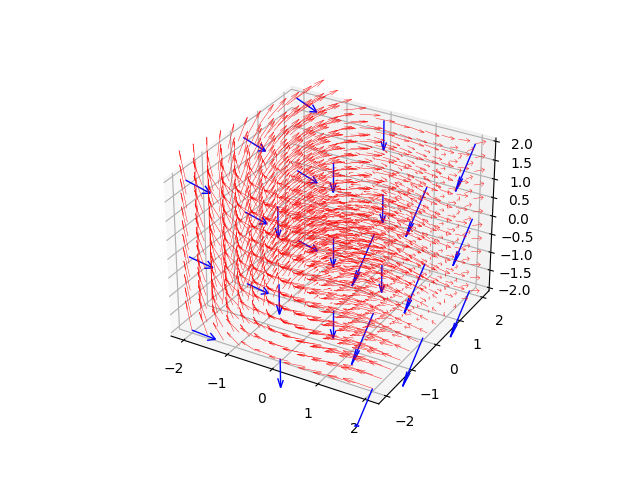

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig= plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    u = v = np.linspace(-2,2,12)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,V,-U,U**2/2,length=.2,color='r',lw=.3);
    u = v = np.linspace(-2,2,5)
    U,V,W = np.meshgrid(np.linspace(-2,2,3),np.linspace(-2,2,3),np.linspace(-2,2,3))
    ax.quiver(U,V,W,0*U,-U,-2-0*U,length=.4,color='b',lw=1);
    
    return fig.canvas

a("A Curl")

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<img alt="George Stokes" src="http://mathshistory.st-andrews.ac.uk/BigPictures/Stokes_3.jpeg" style="float: right">

## Stokes' Theorem
  
  - Objectives

      - orient a surface and its boundary
      - see a brief justification
      - recognize when it applies

<p style="padding-bottom:40%;"> </p>

## Stokes' Theorem

Let $\Omega$ be an oriented surface in $\RR^3$ and $\partial \Omega$ its positively-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\Omega} \nabla \times\vec F \cdot d \vec S = \oint_{\partial \Omega} \vec F\cdot d \vec r$$

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig= plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    slider = FloatSlider(min=0, max=1, step=.01)
    zoom = slider.value
    
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    q1 = ax.plot_surface(p,q,r + 1,color=(.3,.8,.5,.4*(1-zoom)))
#     ax.plot_wireframe(p,q,r,alpha=1,color='k',rcount=6,ccount=6)
    q2 = ax.plot_wireframe(p,q,r + 1,alpha=1-zoom,color='k',rstride=11,cstride=11)
    
    u = np.linspace(.2,.4,35)
    v = np.linspace(.2,.4,35)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    p1 = ax.plot_surface(p,q,r + 1,color=(.3,.2,.8,zoom*.5))
    p2 = ax.plot_wireframe(p,q,r + 1,alpha=zoom,color='k',rcount=3,ccount=3)

    u = np.linspace(.01,.95,13)
    v = np.linspace(.0,1,13)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    q3 = ax.quiver(p,q,r + 1,-q,p*q,p,color=(0,0,.5,.4*(1-zoom)),length=.2)
    # if curl:
    q4 = ax.quiver(p,q,r + 1,np.zeros_like(p),-np.ones_like(p),q + 1,color=(1,0,0,.8*(1-zoom)),length=.2)


    u = np.linspace(.2,.4,4)
    v = np.linspace(.2,.4,4)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    p3 = ax.quiver(p,q,r + 1,-q,p*q,p,color=(0,0,.5,.8*(zoom)),length=.2)

    u = np.linspace(.2+.2/6,.4-.2/6,3)
    v = np.linspace(.2+.2/6,.4-.2/6,3)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)    
    p4 = ax.quiver(p,q,r + 1,np.zeros_like(p),-np.ones_like(p),q + 1,color=(1,0,0,.8*(zoom)),length=.2)

    ax.set_xlim((0+.5*zoom,4 - 2.5*zoom))
    ax.set_ylim((-2 + 2.2*zoom,2 - .8*zoom))
    ax.set_zlim((0+1.5*zoom,4 - 1.5*zoom))
    
    ax.view_init(45, 45)
    
    def update(change):
        zoom = slider.value
        ax.set_xlim((0+.5*zoom,4 - 2.5*zoom))
        ax.set_ylim((-2 + 2.2*zoom,2 - .8*zoom))
        ax.set_zlim((0+1.5*zoom,4 - 1.5*zoom))
        
        q1.set_alpha( .5*(1 - zoom) )
        p1.set_alpha( zoom * .5)
        q2.set_alpha( (1 - zoom) )
        p2.set_alpha( zoom )
        q3.set_alpha( (1 - zoom) )
        p3.set_alpha( zoom )        
        q4.set_alpha( (1 - zoom) )
        p4.set_alpha( zoom )    
        
    slider.observe(update)
    return VBox([slider, fig.canvas])

a("Stokes'")

<p style="padding-bottom:40%;"> </p>

## Faraday's Law

<img src="../img/magnetic-field-lines-around-a-solenoid.png" width="50%" style="float: right;">

\begin{align*}
-\frac{\partial \Phi}{\partial t} &= \iint\limits_{D} -\frac{\partial B}{\partial t} d\vec S  \\ 
\ &= \iint\limits_{D} \nabla\times \vec E\cdot d\vec S \\
\ &= \oint\limits_{\partial D} \vec E\cdot d\vec r 
\end{align*}




<p style="padding-bottom:40%;"> </p>

### Example

Find the flux of the **curl** of the vector field $2y\,\vec i + 3z\,\vec j +x\,\vec k$ through the [surface](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=graph&obj0_params_a=-1&obj0_params_b=1&obj0_params_c=-1&obj0_params_d=1&obj0_params_z=%281+-+x%5E2%29*%281+-+y%5E2%29*%28cos%28pi+%2F+4+*+t%29%5E2%29&obj0_params_tau=0&obj0_params_t0=0&obj0_params_t1=4&obj0_params_color=%231d772f&obj1_kind=curve&obj1_params_a=-1&obj1_params_b=1&obj1_params_x=1&obj1_params_y=t&obj1_params_z=0&obj1_params_tau=0&obj1_params_color=%230032a8&obj2_kind=curve&obj2_params_a=-1&obj2_params_b=1&obj2_params_x=-1&obj2_params_y=t&obj2_params_z=0&obj2_params_tau=0&obj2_params_color=%230032a8&obj3_kind=curve&obj3_params_a=-1&obj3_params_b=1&obj3_params_x=t&obj3_params_y=1&obj3_params_z=0&obj3_params_tau=0&obj3_params_color=%230032a8&obj4_kind=curve&obj4_params_a=-1&obj4_params_b=1&obj4_params_x=t&obj4_params_y=-1&obj4_params_z=0&obj4_params_tau=0&obj4_params_color=%230032a8) $z = (1 - x^2)(1 - y^2)$ above the square $[-1,1]\times [-1, 1]$, oriented upward.
  
  

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(7,7))
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    fade = slider.value

    u = np.linspace(-1,1,100)
    v = np.linspace(-1,1,100)
    U,V = np.meshgrid(u,v)

    ax.plot_surface(U, V, (1 - U**2)*(1 - V**2),alpha=.5)
    ax.plot_wireframe(U, V, (1 - U**2)*(1 - V**2),alpha=1,color='k',rcount=10,ccount=10)
  
    u = v = np.linspace(-1.2,1.2,6)

    U,V,W = np.meshgrid(u,v,u)
    q1 = ax.quiver(U,(V),W,2*V,3*W,U,length=.1,alpha=1-fade);
    q2 = ax.quiver(U,(V),W,0*U - 3,0*W - 1,0*U - 2,length=.2,lw=2,color='r',alpha=fade);
    
    ax.grid(True)
    
    def update(change):
        zoom = slider.value
        q1.set_alpha( 1 - zoom )
        q2.set_alpha( zoom )
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Ravioli")

<p style="padding-bottom:40%;"> </p>

<a href="https://drew.youngren.nyc/3Demos/surfint/?a=0&b=pi&c=0&d=2+pi&x=2+cos%283+u%29+%2B+108*sin%282*u%29%5E2*sin%283*u%29*cos%282*u%29%2Fsqrt%2816*%289*sin%283*u%29%5E2+%2B+49*cos%28u%29%5E2%29%5E2+%2B+11664*sin%282*u%29%5E4*sin%283*u%29%5E2*cos%282*u%29%5E2+%2B+63504*sin%282*u%29%5E4*cos%28u%29%5E2*cos%282*u%29%5E2%29*cos%28v%29+-14*cos%28u%29%2Fsqrt%2836*sin%283*u%29%5E2+%2B+196*cos%28u%29%5E2%29*sin%28v%29+&y=2+sin%28u%29*7+%2B+-252*sin%282*u%29%5E2*cos%28u%29*cos%282*u%29%2Fsqrt%2816*%289*sin%283*u%29%5E2+%2B+49*cos%28u%29%5E2%29%5E2+%2B+11664*sin%282*u%29%5E4*sin%283*u%29%5E2*cos%282*u%29%5E2+%2B+63504*sin%282*u%29%5E4*cos%28u%29%5E2*cos%282*u%29%5E2%29*cos%28v%29+-6*sin%283*u%29%2Fsqrt%2836*sin%283*u%29%5E2+%2B+196*cos%28u%29%5E2%29*sin%28v%29+&z=sin%282+u%29%5E3*3+%2B+%2836*sin%283*u%29%5E2+%2B+196*cos%28u%29%5E2%29%2Fsqrt%2816*%289*sin%283*u%29%5E2+%2B+49*cos%28u%29%5E2%29%5E2+%2B+11664*sin%282*u%29%5E4*sin%283*u%29%5E2*cos%282*u%29%5E2+%2B+63504*sin%282*u%29%5E4*cos%28u%29%5E2*cos%282*u%29%5E2%29*cos%28v%29+&P=z&Q=-x+y+-+z%2F2&R=-z&E=2*x*y&divergence=false&curl=false&colorFunc=false&surfaceVisible=true&tanFrameVisible=false&trailsVisible=true&S=graphs&nX=48&rNum=12&cNum=12&shards=0&nVec=5&scale=1.02"><img src="../img/hose.png" style="float: right;" width ="40%"></a>

### Example

A hose connects two ports, unit circles in the $xz$-plane centered at $x = \pm 2, z = 0$. Find the flux out of the hose of the curl of the vector field 

$$\vec F(x,y,z) = z\,\vec i - (xy + z/2)\,\vec j - z \vec k$$

<p style="padding-bottom:40%;"> </p>

### Exercise

Compute the line integral $\oint_{\partial D} \vec F \cdot d\vec r$ around the ccw (from above) boundary of the surface $D$ given.

$$ \vec F(x,y,z) = xyz \,\vec i + y \,\vec j + z \,\vec k$$

where $D$ is the portion of the surface $z=x^2$ above $x^2 + y^2 \leq a^2$ in the first octant.

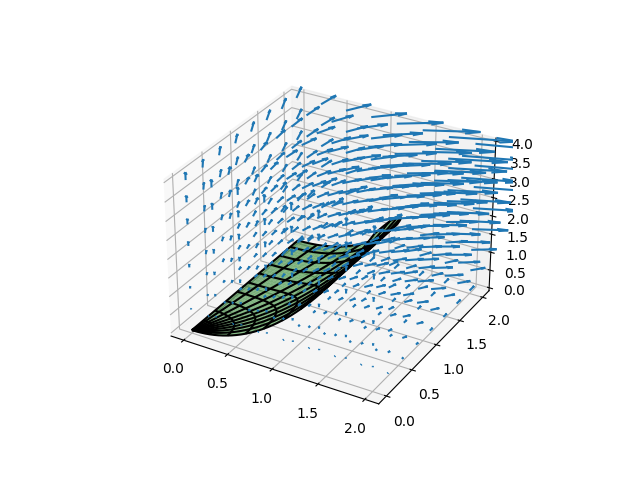

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    
    ax = fig.add_subplot(projection='3d')
    
    u = np.linspace(0,2,40)
    v = np.linspace(0,pi/2,40)
    U,V = np.meshgrid(u,v)

    ax.plot_surface(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=.5,color='g')
    ax.plot_wireframe(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=1,color='k',rcount=10,ccount=10)
    # ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
    # ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(0,2,8)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,2*u)
    ax.quiver(U,V,W,U*W*V,V,W,length=.05);
    
    return fig.canvas

a("A border integral")


<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

**Challenge** Parametrize the boundary of this surface and compute the line integral directly to verify this number.

<p style="padding-bottom:40%;"> </p>